1) Data Set details

In [ ]:
import pandas as pd
import os

directoryFrom = '/content/'
for filename in os.listdir(directoryFrom):
  # print(filename)
  if filename.endswith(".xlsx"):
    # print()
    filePath = directoryFrom + filename
    data = pd.read_excel(filePath)

    # details
    rows, columns = data.shape
    print("- file: ", filePath,)
    print("- rows: ", rows)
    print("- columns: ", columns)
    print("- first 4 columns presetnitng: \n")
    print(data.iloc[:,0:4])

- file:  /content/As-po-As-bez-O2-ln.xlsx
- rows:  173
- columns:  72
- first 4 columns presetnitng: 

      czas [h]  As4 bez O As_0  As4 bez O As_0,25  As4 bez O As_0,5
0     0.000000       -2.104144          -2.068699         -2.025560
1     0.496667       -2.108170          -2.070521         -2.037686
2     0.993333       -2.099726          -2.070601         -2.050971
3     1.489722       -2.082647          -2.067197         -2.057837
4     1.986389       -2.056507          -2.051360         -2.055569
..         ...             ...                ...               ...
168  83.430556       -1.463607          -1.206543         -1.426325
169  83.927222       -1.533820          -1.290548         -1.286087
170  84.423889       -1.535769          -1.104429         -1.440920
171  84.920556       -1.491788          -1.339449         -1.422958
172  85.417222       -1.547967          -1.470198         -1.436956

[173 rows x 4 columns]


2) Prepare data

In [ ]:
# time columns as independent variable
X = data["czas [h]"]

# remove from dataset redundant columns and independent variable
Y = data.loc[:, ~data.columns.str.startswith(("Unnamed:", "czas"))]

#information
rows, columns = Y.shape
print("- data rows: ", rows)
print("- data columns: ", columns)
rows = len(X)
print("-  rows: ", rows)

- data rows:  173
- data columns:  63
-  rows:  173


3) Plot example of the data

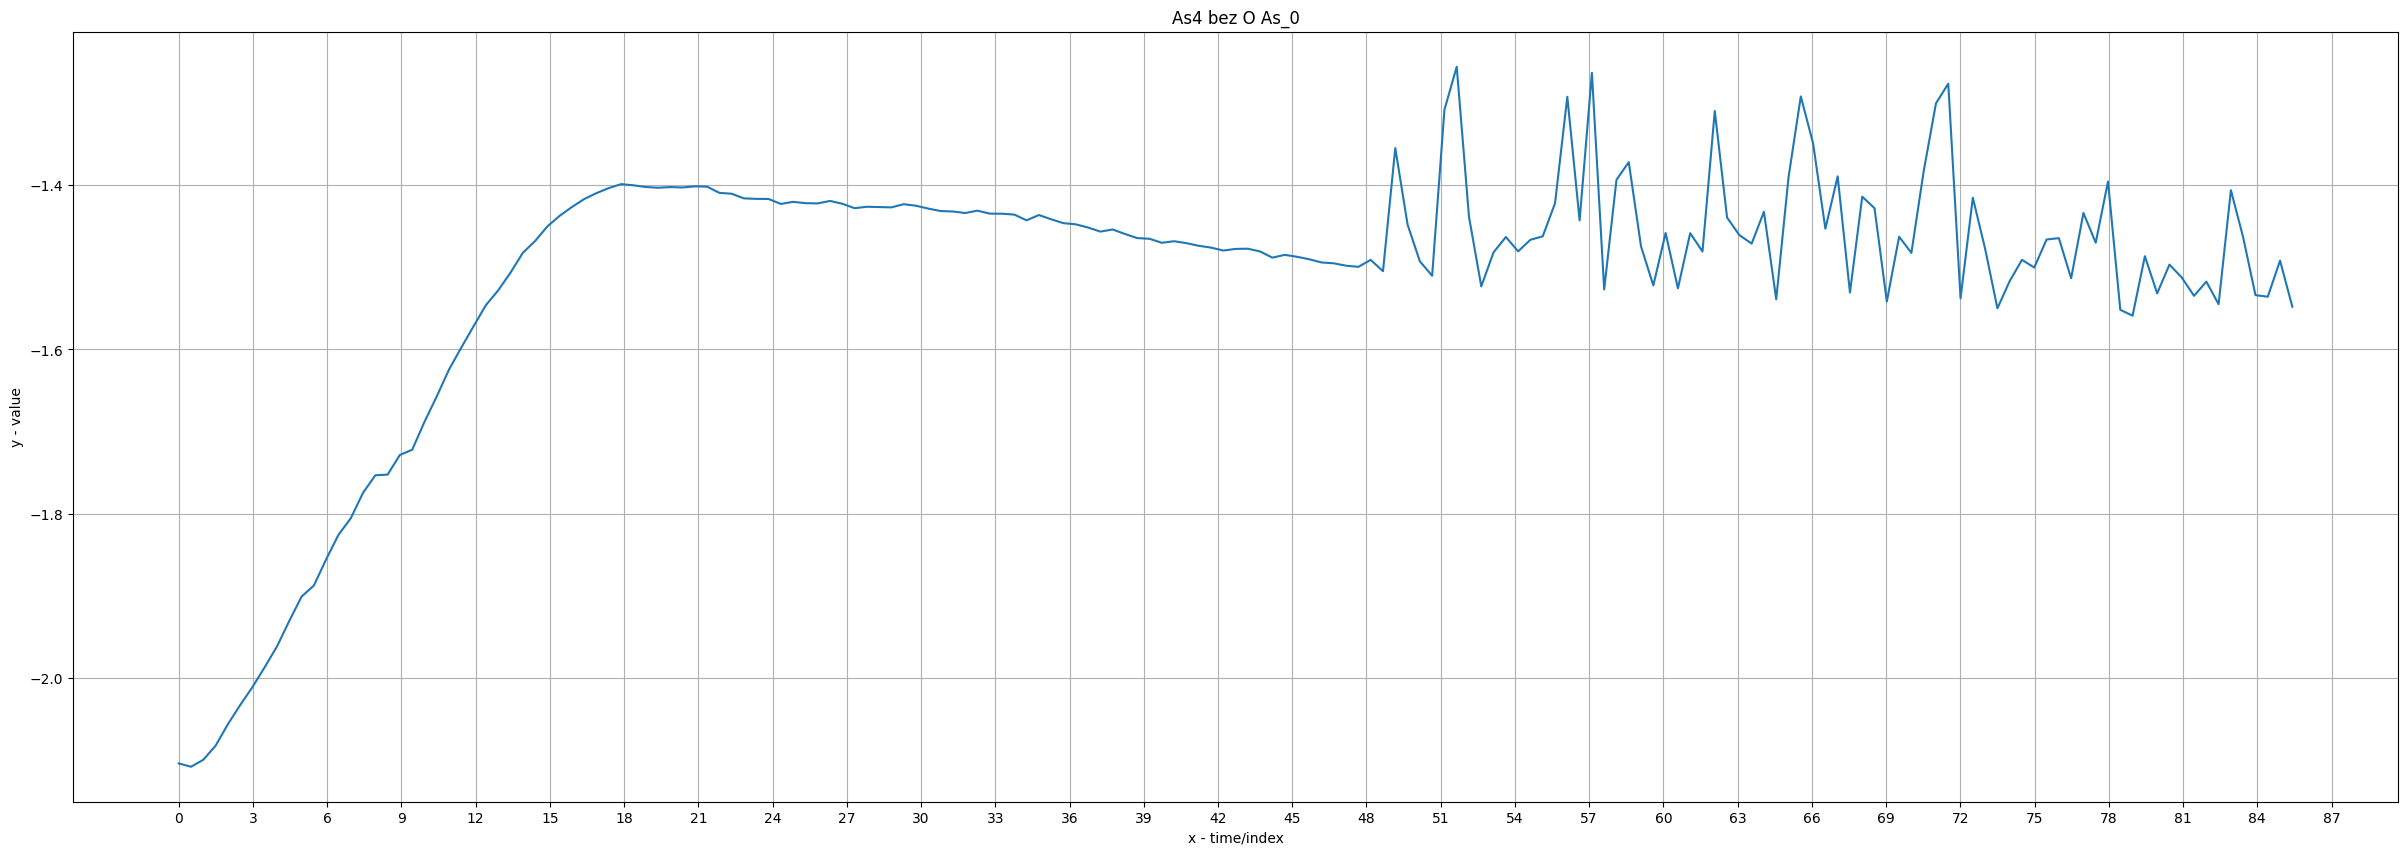

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot(x, y, columnName):
  plt.xticks(np.arange(0, len(x), 3))
  plt.rcParams["figure.figsize"] = (30,10)
  plt.grid()
  plt.title(columnName)
  plt.xlabel('x - time/index')
  plt.ylabel('y - value')
  plt.plot(x, y)
  plt.show()


columnName = "As4 bez O As_0"
Y1 = Y[columnName]
plot(X, Y1, columnName)

4) Set Indexes with catching errors

In [ ]:
def textToNumber(text):
  number = -1
  try:
    number = int(text)
  except Exception:
    print("incorrect value, required number")
  return number

def getBeginIndex(maxNumber):
  index = 0
  while True:
    index = input("Index begin = ")
    index = textToNumber(index)
    if (index < maxNumber and index >= 0):
      break
    else:
      print("Begin index have to greater than 0 and less than length of rows in column")
  return index

def getEndIndex(maxNumber, beginIndex):
  index = 0
  while True:
    index = input("Index end = ")
    index = textToNumber(index)
    if (index <= maxNumber and index > beginIndex):
      break
    else:
      print("End index have to greater than begin index and less than length of rows in column")
  return index

numberOfIndexes = len(X)
beginIndex = getBeginIndex(numberOfIndexes)
endIndex = getEndIndex(numberOfIndexes, beginIndex)
print("\nIndex Begin = ", beginIndex, "\nIndex End = ", endIndex)

Index begin = e
incorrect value, required number
Begin index have to greater than 0 and less than length of rows in column
Index begin = -2
Begin index have to greater than 0 and less than length of rows in column
Index begin = 200
Begin index have to greater than 0 and less than length of rows in column
Index begin = 2
Index end = 1
End index have to greater than begin index and less than length of rows in column
Index end = 22

Index Begin =  2 
Index End =  22


5) Calcualte Alpha and R2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

def calculateAlfaAndR2(Xdata, Ydata, begin, end):
  x = Xdata[begin:end]
  y = Ydata[begin:end]

  regModel = LinearRegression().fit(x.to_frame(), y)
  r2 = regModel.score(x.to_frame(), y)
  alfa = regModel.coef_[0]

  print("\t alfa =", alfa)
  print("\t r2 =", r2)
  return alfa, r2

#test
x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([2, 4, 6, 8, 10])
alfa, r2 = calculateAlfaAndR2(x, y, 0, 5)
assert alfa == 2
assert r2 == 1

	 alfa = 2.0
	 r2 = 1.0


# Project



[ 1 / 173 ]   As4 bez O As_0


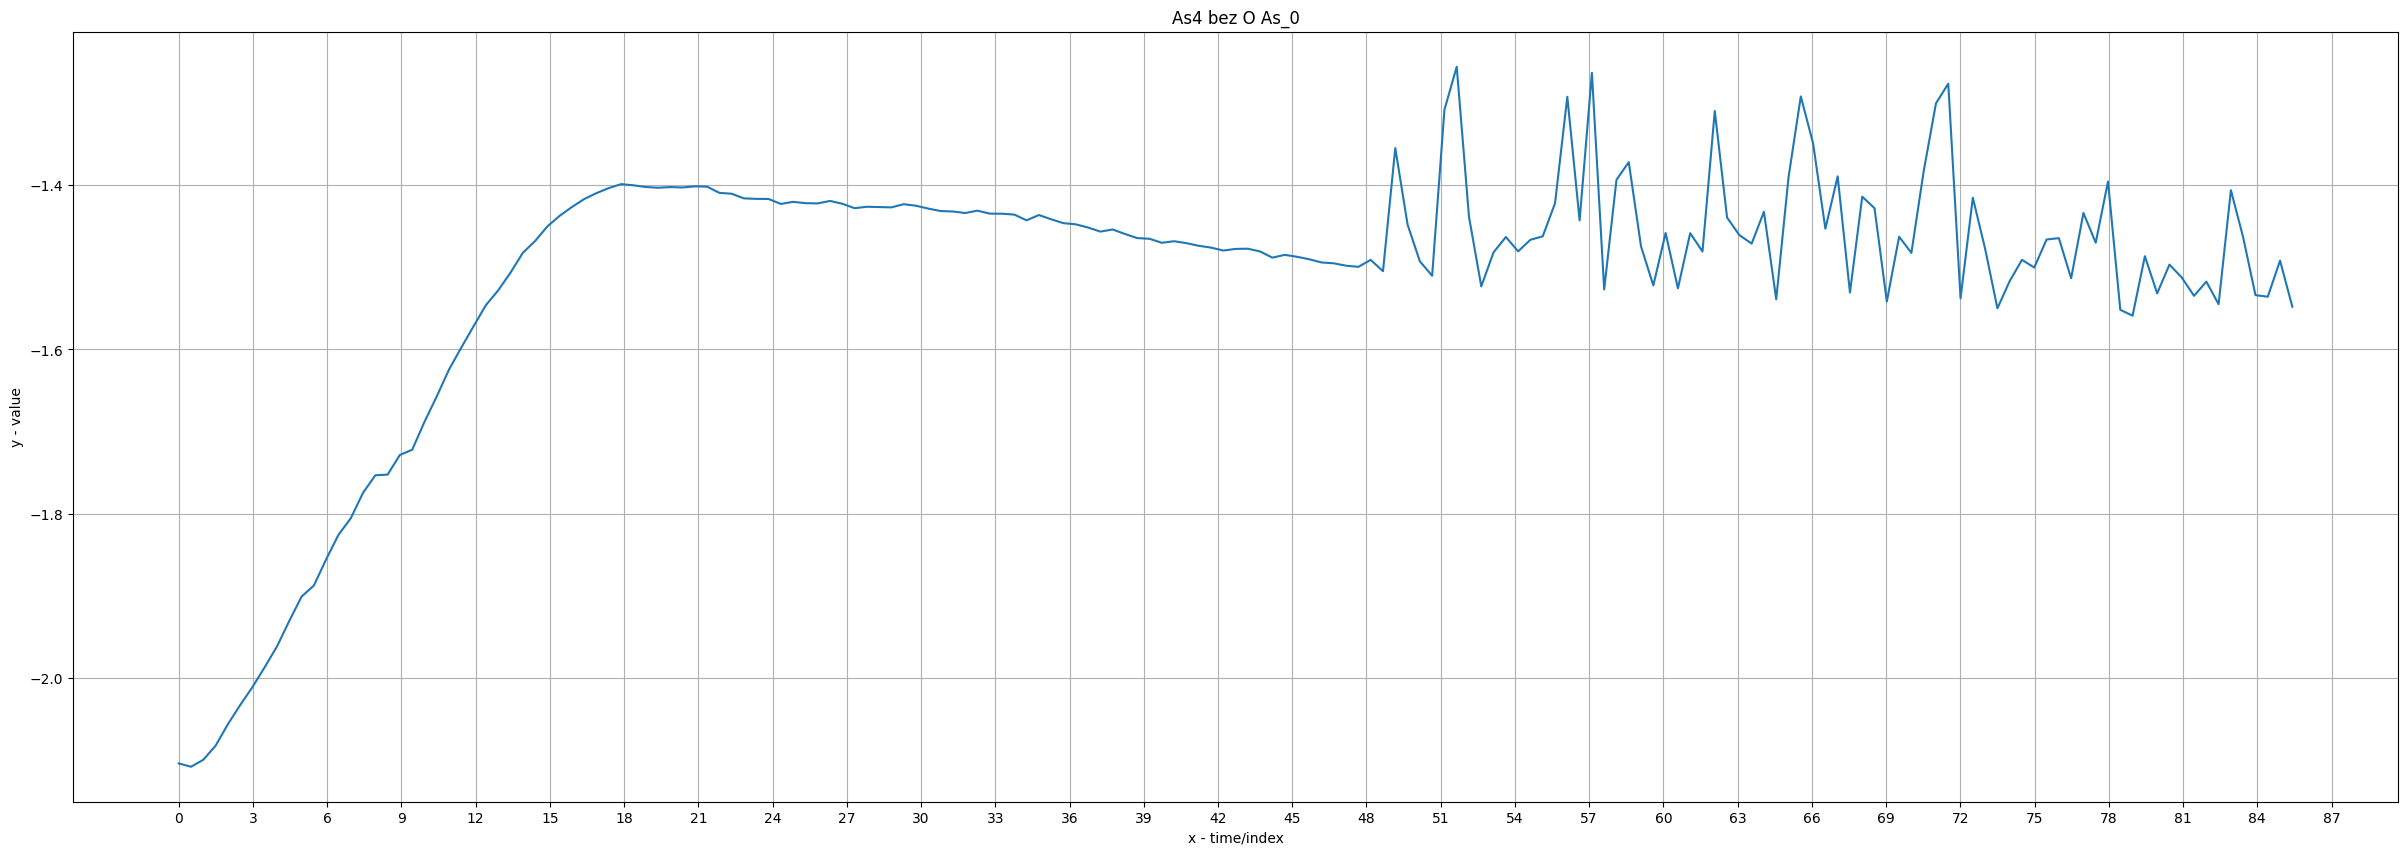

Index begin = 2
Index end = 22
	 alfa = 0.047286339685681744
	 r2 = 0.9943258555995705
make correct? [y/n]:n


[ 2 / 173 ]   As4 bez O As_0,25


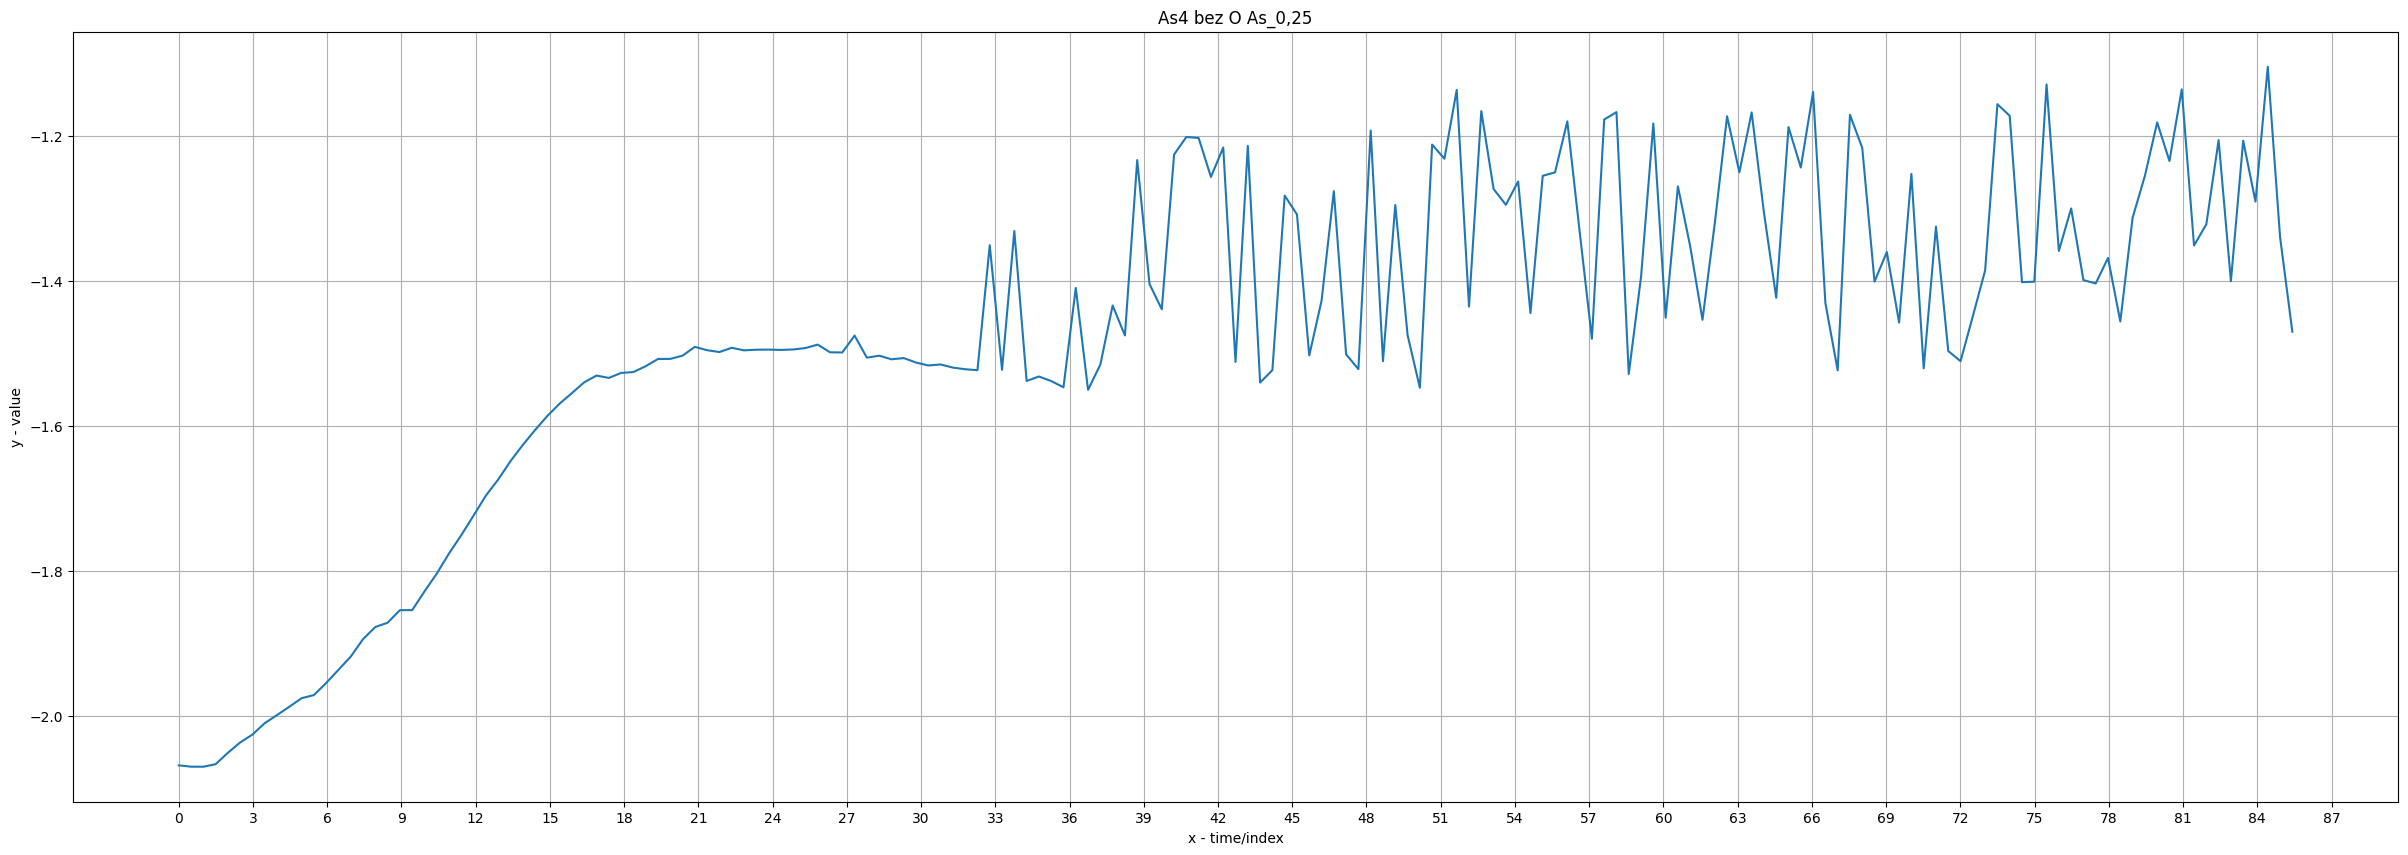

Index begin = 3
Index end = 15
	 alfa = 0.025541228270737414
	 r2 = 0.9929299042086379
make correct? [y/n]:n

 File with results was saved in: /content/extracted_As-po-As-bez-O2-ln.csv


In [ ]:
import pandas as pd # do czytania i zapisywania plikow xml/csv
import numpy as np # do obliczeń i działania na zbiorach
import matplotlib.pyplot as plt # do rysowania wykresów
from sklearn.linear_model import LinearRegression # do obliczenia r2 i alfa
import os # do wylistowania plików w folderze
import time # do wymuszenia zatrzymania na sekunde - sleep(1)

def plot(x, y, columnName):
  plt.xticks(np.arange(0, len(x), 3))
  plt.rcParams["figure.figsize"] = (30,10)
  plt.grid()
  plt.title(columnName)
  plt.xlabel('x - time/index')
  plt.ylabel('y - value')
  plt.plot(x, y)
  plt.show()
  time.sleep(1) # because of problem of connect plotting with input functions - https://stackoverflow.com/questions/29189536/ipython-jupyter-input-prevents-plot-showing

def textToNumber(text):
  number = -1
  try:
    number = int(text)
  except Exception:
    print("incorrect value, required number")
  return number

def getBeginIndex(maxNumber):
  index = 0
  while True:
    index = input("Index begin = ")
    index = textToNumber(index)
    if (index < maxNumber and index >= 0):
      break
    else:
      print("Begin index have to greater than 0 and less than length of rows in column")
  return index

def getEndIndex(maxNumber, beginIndex):
  index = 0
  while True:
    index = input("Index end = ")
    index = textToNumber(index)
    if (index <= maxNumber and index > beginIndex):
      break
    else:
      print("End index have to greater than begin index and less than length of rows in column")
  return index

def calculateAlfaAndR2(Xdata, Ydata, begin, end):
  x = Xdata[begin:end]
  y = Ydata[begin:end]
  regModel = LinearRegression().fit(x.to_frame(), y)
  r2 = regModel.score(x.to_frame(), y)
  alfa = regModel.coef_[0]
  print("\t alfa =", alfa)
  print("\t r2 =", r2)
  return alfa, r2

########################
### główny algorytm ####
########################

directoryFrom = '/content/'
directoryTo = '/content/'
outputs = [["column_name", "index_begin", "index_end", "r2", "alfa"]]

for filename in os.listdir(directoryFrom):
  if filename.endswith(".xlsx"):
    filePath = directoryFrom + filename
    data = pd.read_excel(filePath)
    numberOfRrows = data.shape[0]

    X = data["czas [h]"]
    Y = data.loc[:, ~data.columns.str.startswith(("Unnamed:", "czas"))]

    #for presenting and testing
    numberOfExampleToShow = 2
    Y = Y.iloc[:,:numberOfExampleToShow]

    for nr, columnName in enumerate(Y.columns, start=1):
      print("\n\n[", nr, "/",  numberOfRrows, "]  ", columnName)
      YForColumn = Y[columnName]
      plot(X, YForColumn, columnName)

      while True:
        numberOfIndexes = len(YForColumn)
        beginIndex= getBeginIndex(numberOfIndexes)
        endIndex = getEndIndex(numberOfIndexes, beginIndex)
        alfa, r2 = calculateAlfaAndR2(X, YForColumn, beginIndex, endIndex)

        repeat = input("make correct? [y/n]:")
        if repeat == "n":
          outputs.append([columnName, beginIndex, endIndex, r2, alfa])
          break

    filenameWithoutExtension = filename[:-5]
    outpuFile = directoryTo + "extracted_" + filenameWithoutExtension + ".csv"
    pd.DataFrame(outputs).to_csv(outpuFile, index=False)
    print("\n File with results was saved in:", outpuFile)